<a href="https://colab.research.google.com/github/ahmedchafiq/encg/blob/main/Breast_Cancer_Diagnosis_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
prince7489_breast_cancer_diagnosis_dataset_path = kagglehub.dataset_download('prince7489/breast-cancer-diagnosis-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'breast-cancer-diagnosis-dataset' dataset.
Data source import complete.


In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-diagnosis-dataset/breast_cancer_dataset_medium.csv


In [15]:
import numpy as np
import pandas as pd
data=pd.read_csv('/kaggle/input/breast-cancer-diagnosis-dataset/breast_cancer_dataset_medium.csv')

In [16]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension
0,1,M,7.14,14.65,43.11,743.05,0.1282,0.1791,0.1863,0.0760
1,2,B,17.69,8.85,105.40,3963.38,0.1964,0.3989,0.1758,0.0708
2,3,M,17.89,13.81,90.37,3453.29,0.0688,0.2280,0.2830,0.0573
3,4,M,20.02,26.66,113.76,5402.59,0.0525,0.1353,0.1502,0.0404
4,5,M,21.97,21.49,126.56,6741.27,0.1655,0.0958,0.2688,0.0698


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 600 non-null    int64  
 1   diagnosis          600 non-null    object 
 2   radius_mean        600 non-null    float64
 3   texture_mean       600 non-null    float64
 4   perimeter_mean     600 non-null    float64
 5   area_mean          600 non-null    float64
 6   smoothness_mean    600 non-null    float64
 7   compactness_mean   600 non-null    float64
 8   symmetry_mean      600 non-null    float64
 9   fractal_dimension  600 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 47.0+ KB


In [18]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,16.801233,24.314300,100.673217,4037.935783,0.124534,0.205297,0.196542,0.069725
std,173.349358,6.459212,9.422115,40.213501,2802.666521,0.043697,0.111642,0.057138,0.017344
min,1.000000,6.100000,8.160000,34.150000,413.620000,0.050000,0.010300,0.100000,0.040000
25%,150.750000,11.007500,15.872500,65.602500,1438.232500,0.087100,0.106875,0.146700,0.054500
50%,300.500000,16.835000,24.725000,100.505000,3446.315000,0.125050,0.203650,0.196500,0.069150
75%,450.250000,22.442500,32.467500,130.980000,6122.152500,0.161575,0.303550,0.240150,0.085025
max,600.000000,27.990000,39.980000,193.140000,11050.180000,0.199200,0.399800,0.299500,0.099800


In [19]:
data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
symmetry_mean,0
fractal_dimension,0


In [20]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,312
M,288


In [21]:
X=data.drop(["diagnosis","id"],axis=1)
y=data["diagnosis"]

In [22]:
type(X)

pandas.core.frame.DataFrame

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = pd.Series(le.fit_transform(y), name=y.name)

In [24]:
y

,diagnosis
0,1
1,0
2,1
3,1
4,1
...,...
595,0
596,1
597,1
598,0


In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [26]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension
0,-1.496977,-1.026560,-1.432634,-1.176606,0.083969,-0.234847,-0.179394,0.362088
1,0.137712,-1.642646,0.117640,-0.026624,1.646004,1.735582,-0.363313,0.062015
2,0.168701,-1.115786,-0.256427,-0.208777,-1.276513,0.203524,1.514412,-0.717020
3,0.498738,0.249165,0.325704,0.487319,-1.649844,-0.627498,-0.811725,-1.692256
4,0.800884,-0.300002,0.644271,0.965363,0.938278,-0.981602,1.265683,0.004309


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
xgb_model = XGBClassifier(n_estimators=200)
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.54      0.56        65
           1       0.49      0.53      0.51        55

    accuracy                           0.53       120
   macro avg       0.53      0.53      0.53       120
weighted avg       0.54      0.53      0.53       120



In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.52      0.50        65
           1       0.38      0.35      0.36        55

    accuracy                           0.44       120
   macro avg       0.43      0.43      0.43       120
weighted avg       0.44      0.44      0.44       120



In [30]:
from sklearn.svm import SVC
model=SVC(kernel='rbf',C=1.0,gamma='scale',class_weight='balanced',random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.49      0.53        65
           1       0.48      0.56      0.52        55

    accuracy                           0.53       120
   macro avg       0.53      0.53      0.52       120
weighted avg       0.53      0.53      0.53       120



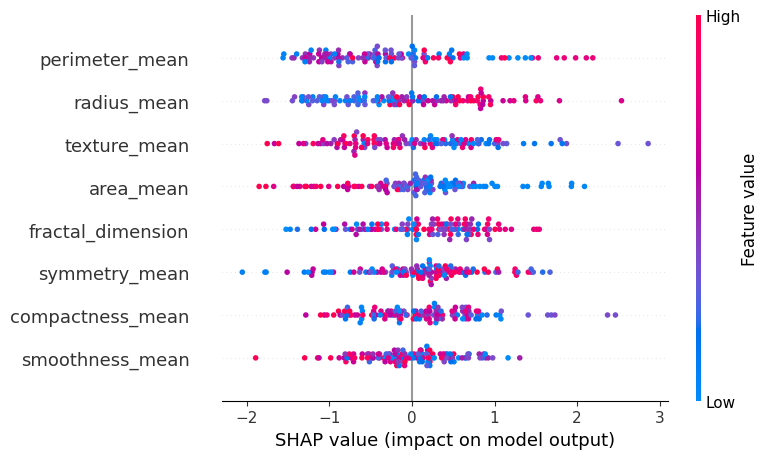

In [31]:
import shap
explainer = shap.TreeExplainer(xgb_model.get_booster())
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)